# Zadanie 10 (10 pkt)
### Deadline 24.02 o 23:59

Zadaniem jest określenie typów wina na podstawie poniższego zbioru danych:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

1. Przeprowadź **krótką** wstępną analizę danych (1 pkt)
2. Stwórz funkcję budującą **model (DNN)** (2 pkt)
3. Przeprowadź **trening i walidację** wyników (2 pkt)
4. Na podstawie historii treningu przedstaw **zmianę funkcji loss** (1 pkt)
5. Sprawdź jak **zmiana parametrów i architektury Twojej sieci wpływa na wyniki** i przedstaw swoje obserwacje (4 pkt)

Punkty 3-5 powinny obejmować odpowiednio **skomentowane wyniki**.

In [2]:
from sklearn.datasets import load_wine
data = load_wine()
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.utils import to_categorical

# Eksploracja i analiza danych

In [5]:
df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
df.duplicated().sum()

0

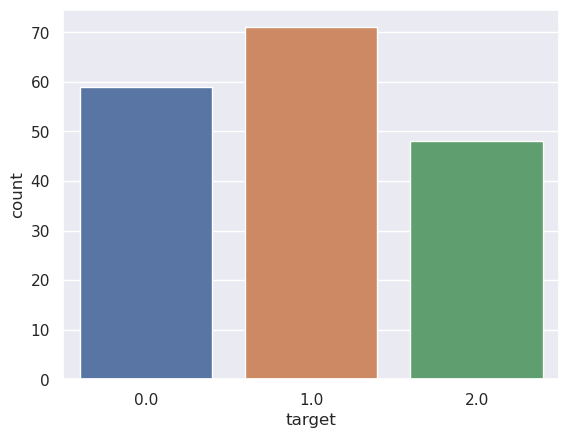

In [7]:
sns.countplot(x=df["target"])
pass

### Wnioski
* W zbiorze danych nie ma wartości 'null' oraz duplikatów.
* Zbiór danych jest stosunkowo mały - zawiera jedynie 178 próbek.
* W zbiorze znajdują się dane dla trzeh klas win: 0, 1 i 2 opisanych przez 13 zmiennych. Ilości próbek danej klasy są zbliżone - nie mamy do czynienia z niedoreprezentowaniem żadnej z klas (nie musimy przygotowywać danych i modelu uwzględniających niezbalansowanie klas).  

## Zakres i rozkład danych

In [8]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

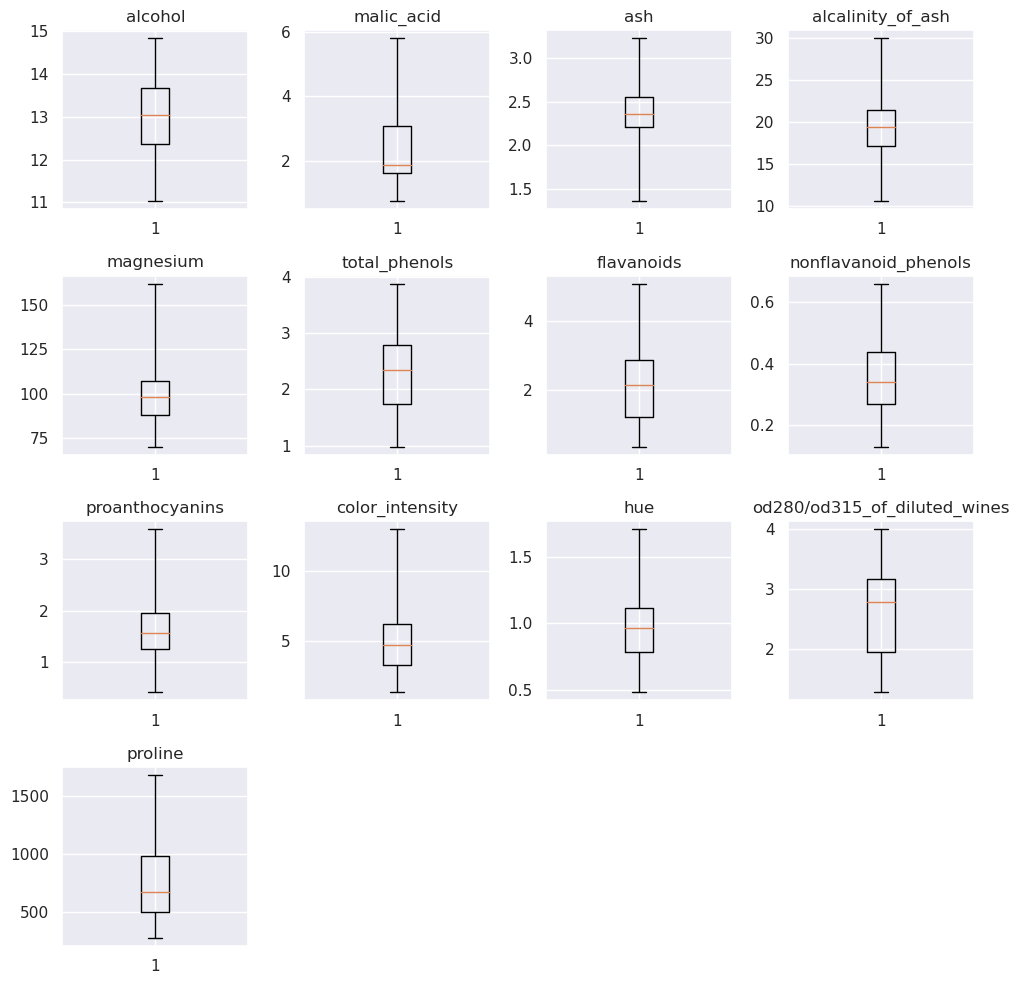

In [9]:
i = 1
plt.figure(figsize=(10,10))
for var in list(df.drop('target', axis=1).columns):
   plt.subplot(4,4,i)
   plt.boxplot(df[var],whis=5)
   plt.title(var)
   i+=1
plt.tight_layout()
plt.show()

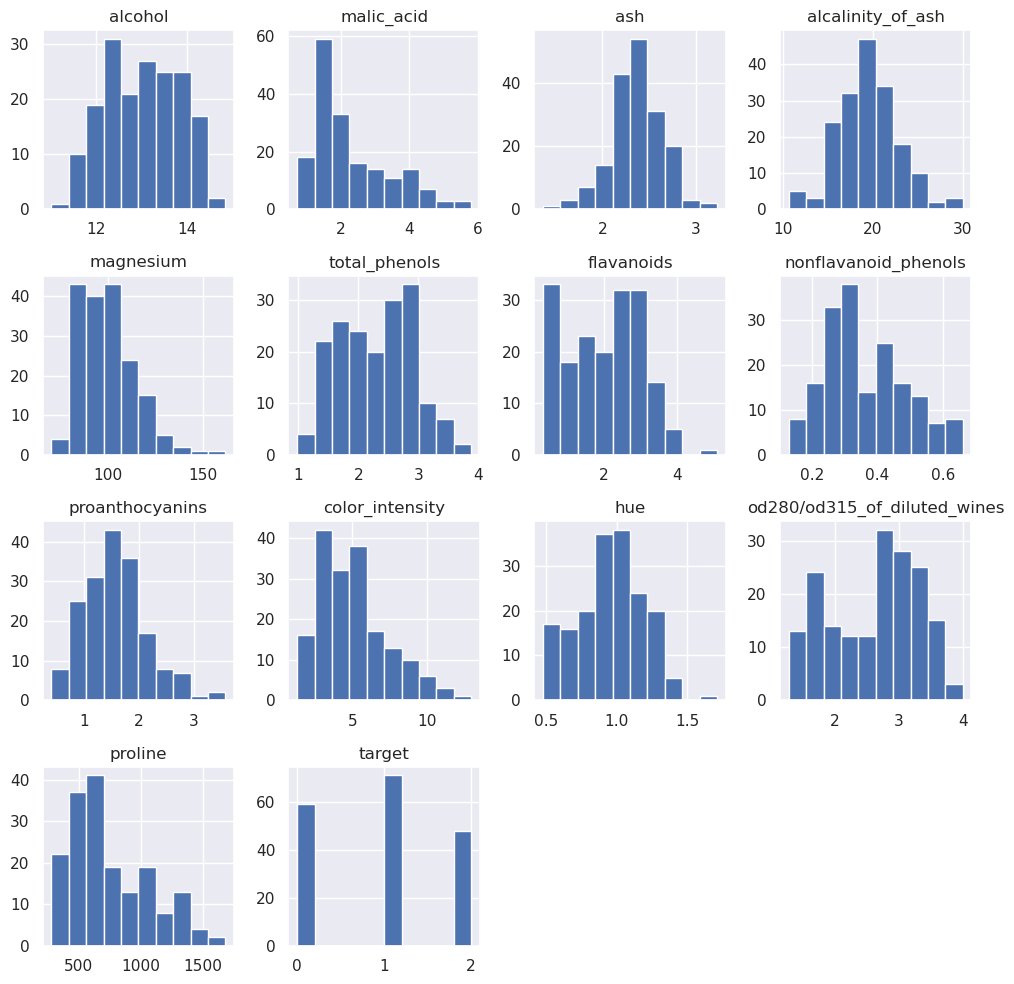

In [10]:
df.hist(figsize=(10,10)) 
plt.tight_layout()
plt.show()

## Zróżnicowanie wartości w obrębie klas i korelacja pomiędzy zmiennymi

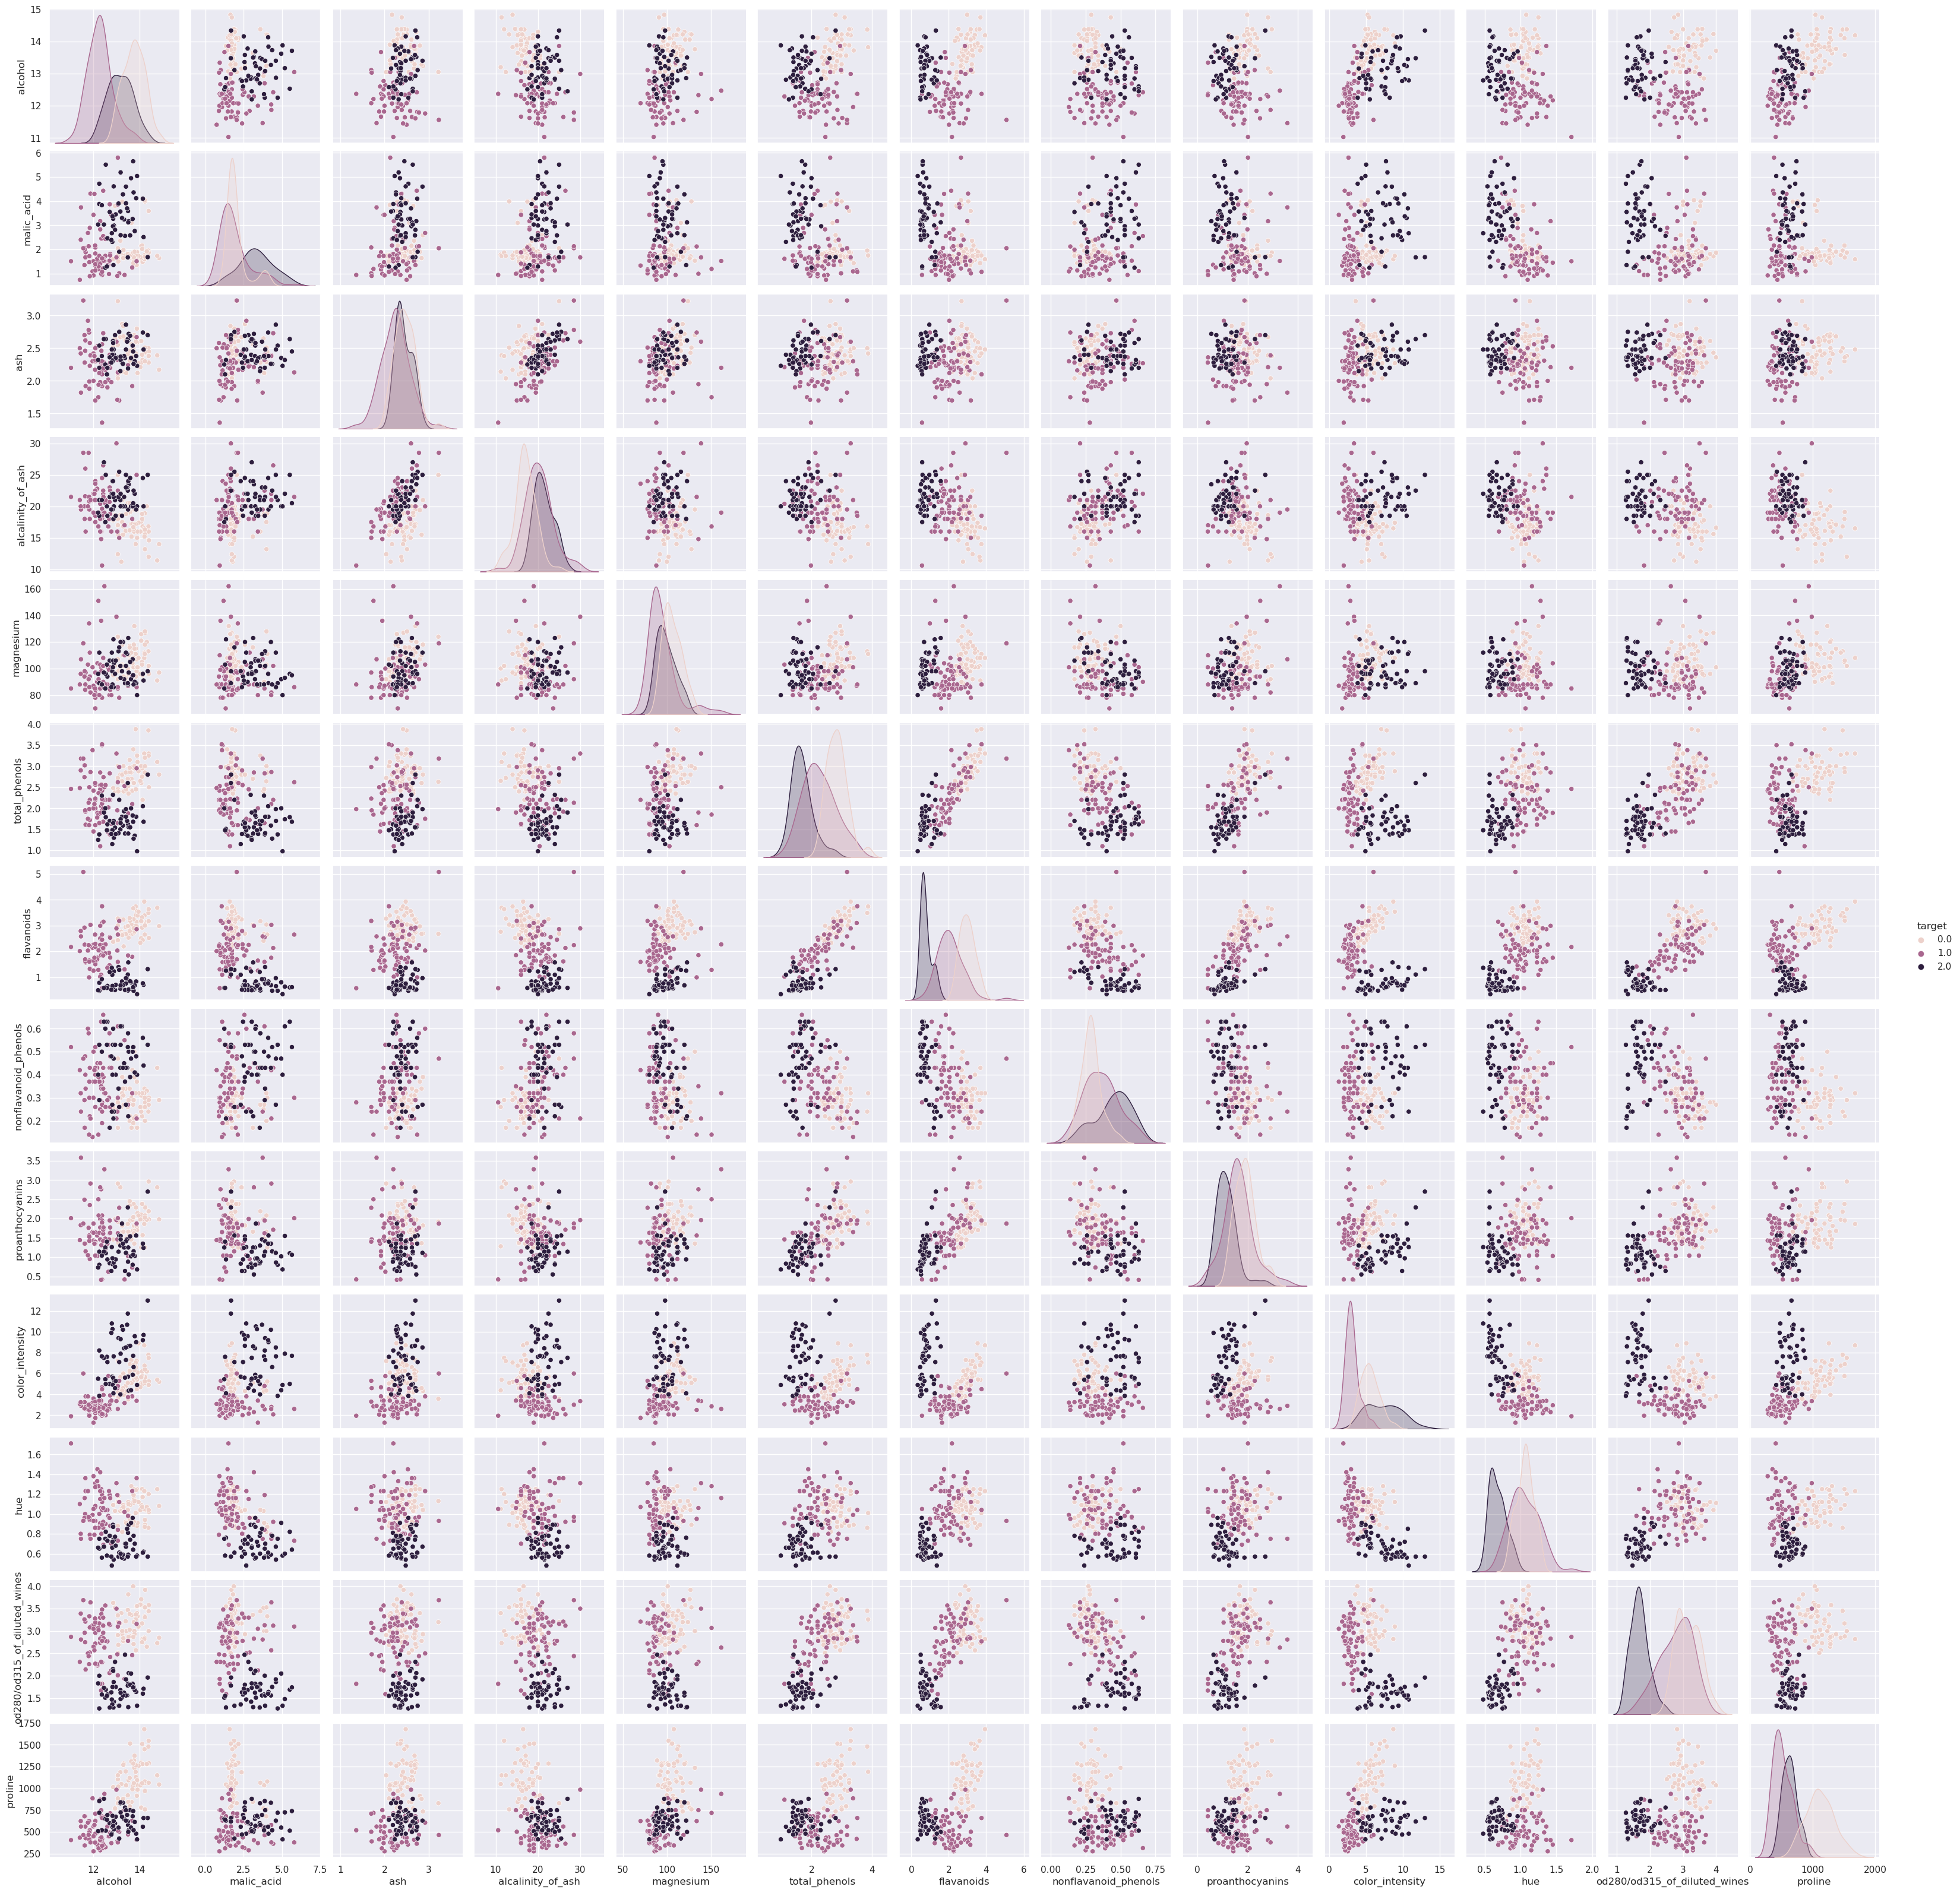

In [10]:
sns.pairplot(df,hue='target')
pass

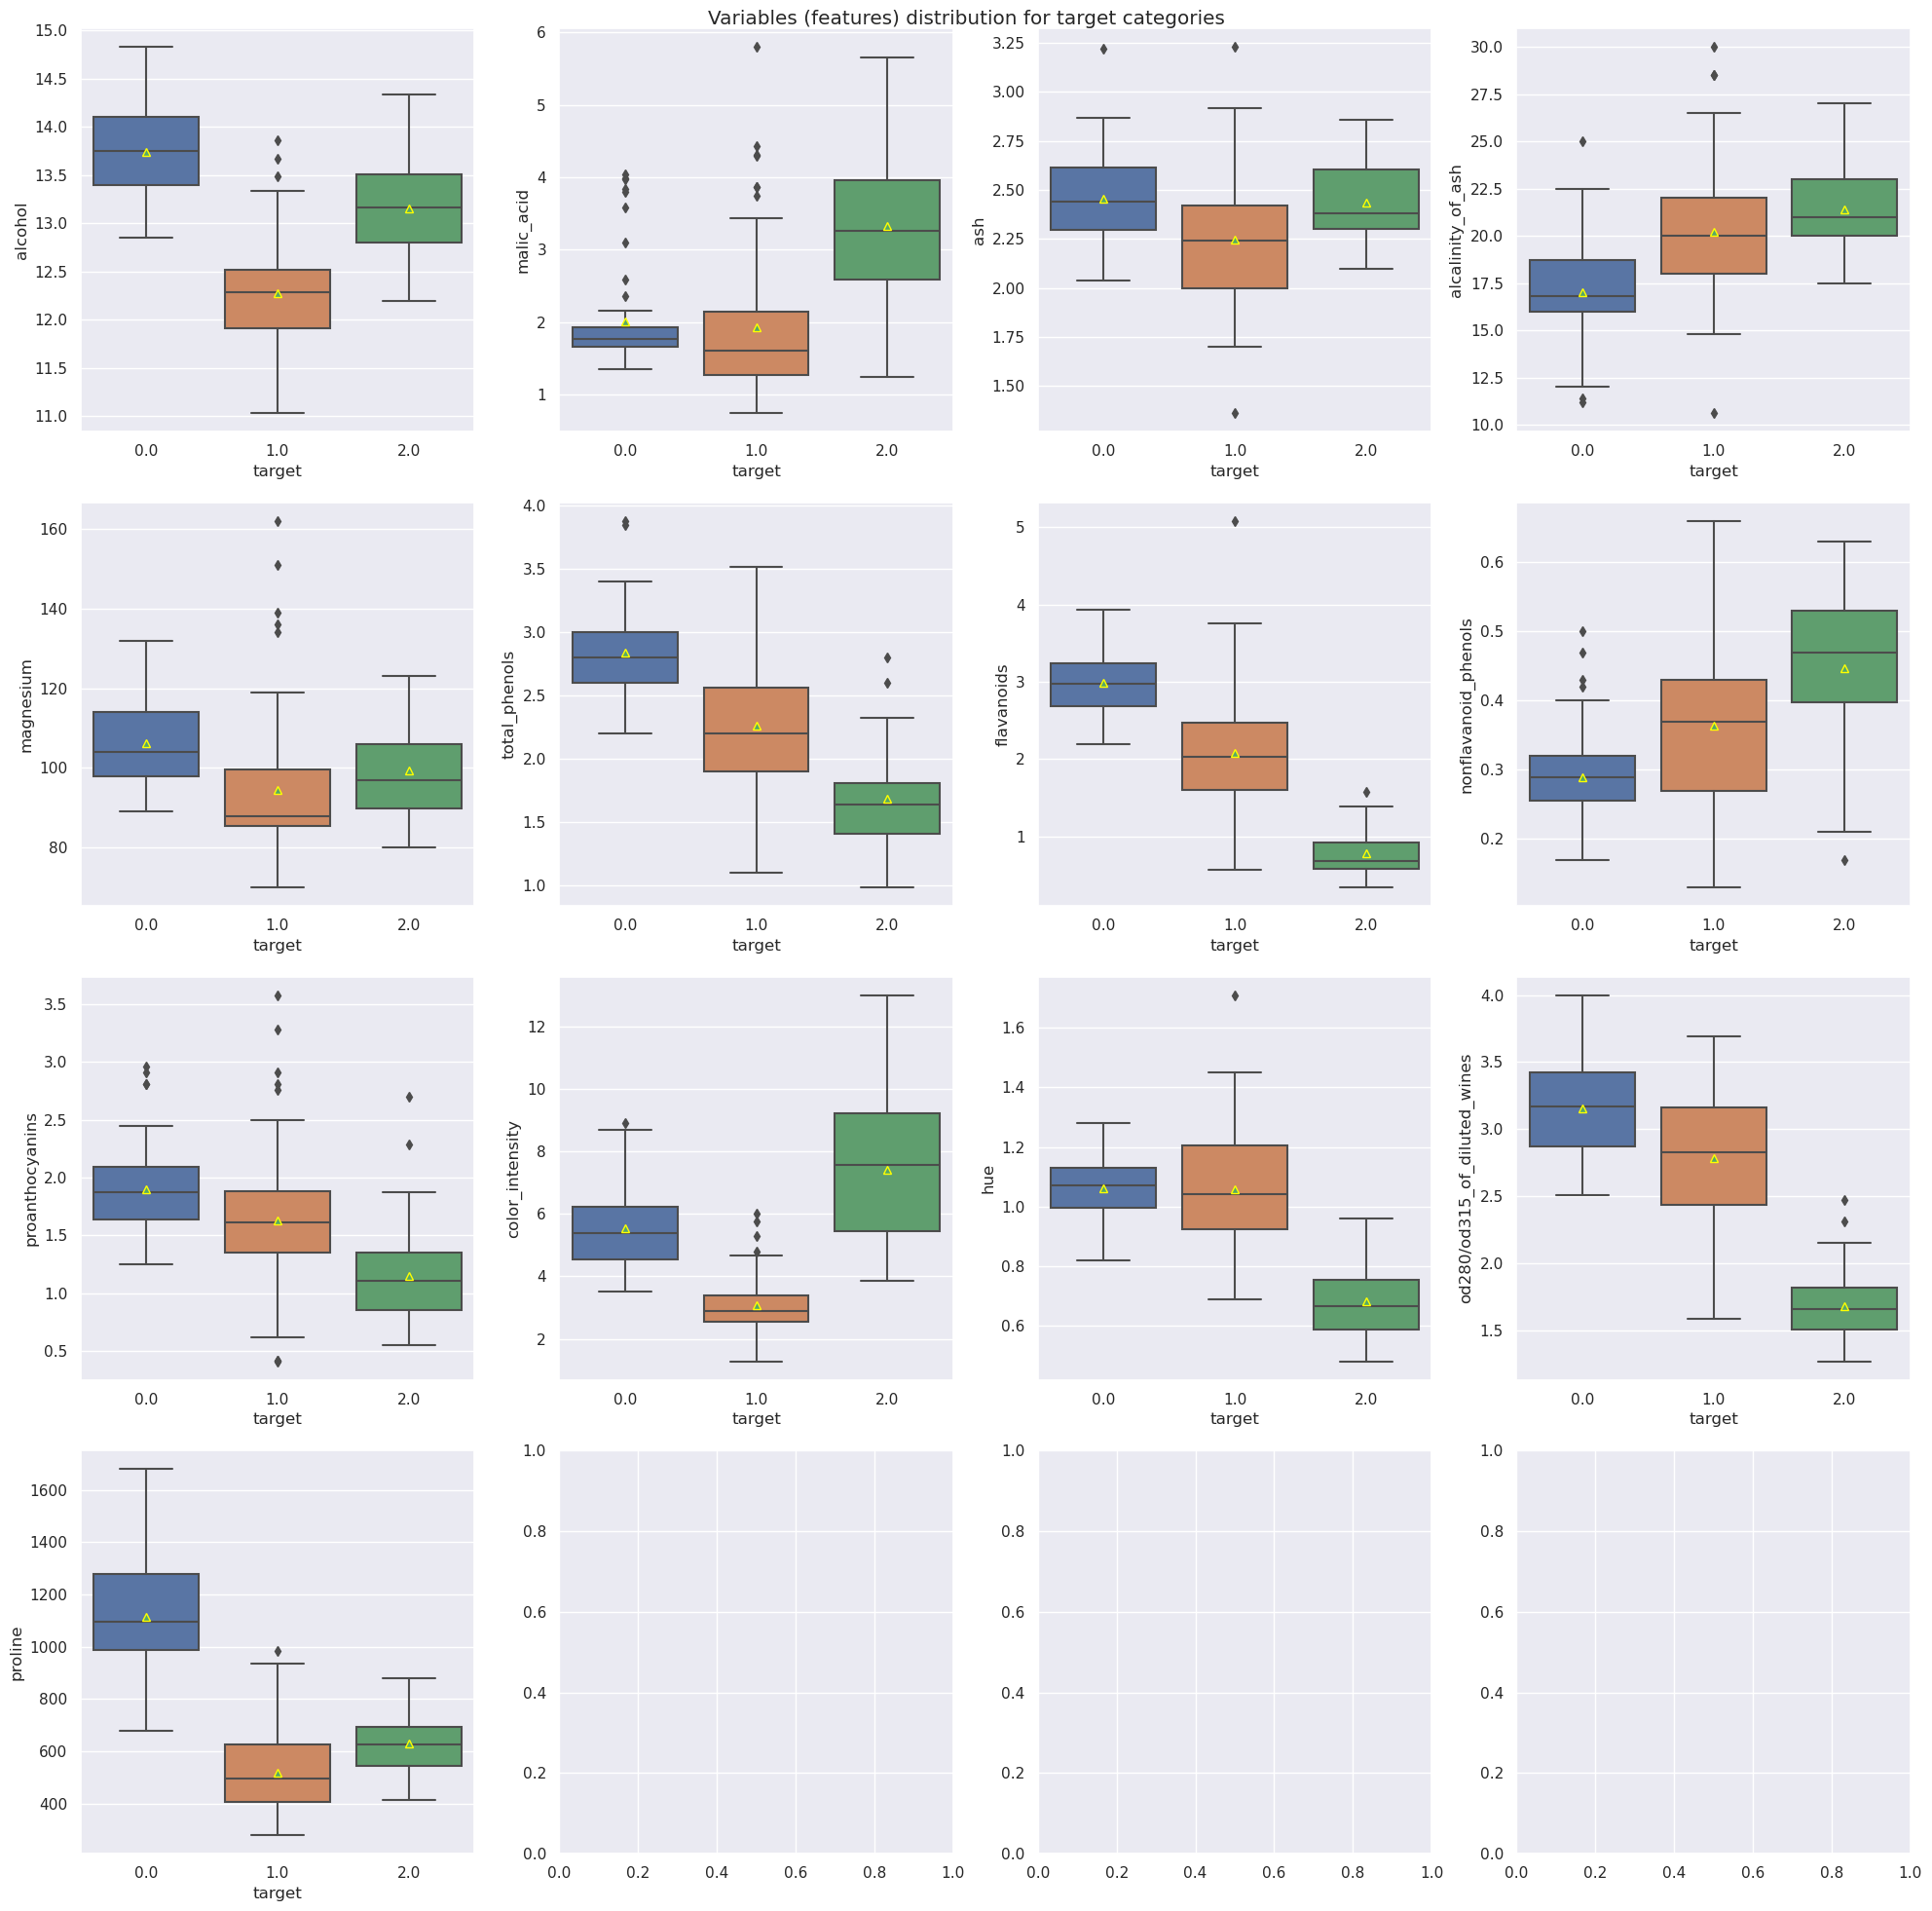

In [12]:
# Boxplots
features = list(df.drop('target', axis=1).columns)
target = 'target'

def draw_boxplot(df, features, target,ncol):

    if len(features)%ncol !=0:
        nrows = (len(features))//ncol+1
    else:
        nrows = int((len(features))/ncol)

    fig, axes = plt.subplots(nrows, ncol,figsize=(20, nrows*5))
    fig.suptitle(f'Variables (features) distribution for target categories')
    
    row=0
    i=0
    
    for feature in features:
        if nrows != 1:
            sns.boxplot(data=df, x=target, y=feature, showmeans=True, meanprops={"markeredgecolor": "yellow"},ax=axes[row,i])
            i += 1
            if i > ncol-1 and nrows != 1:
                i = 0
                row += 1
        else:
            sns.boxplot(data=df, x=target, y=feature, showmeans=True, meanprops={"markeredgecolor": "yellow"},ax=axes[i])
            i += 1
    plt.tight_layout()
    plt.show()
    
draw_boxplot(df, features, target,4)

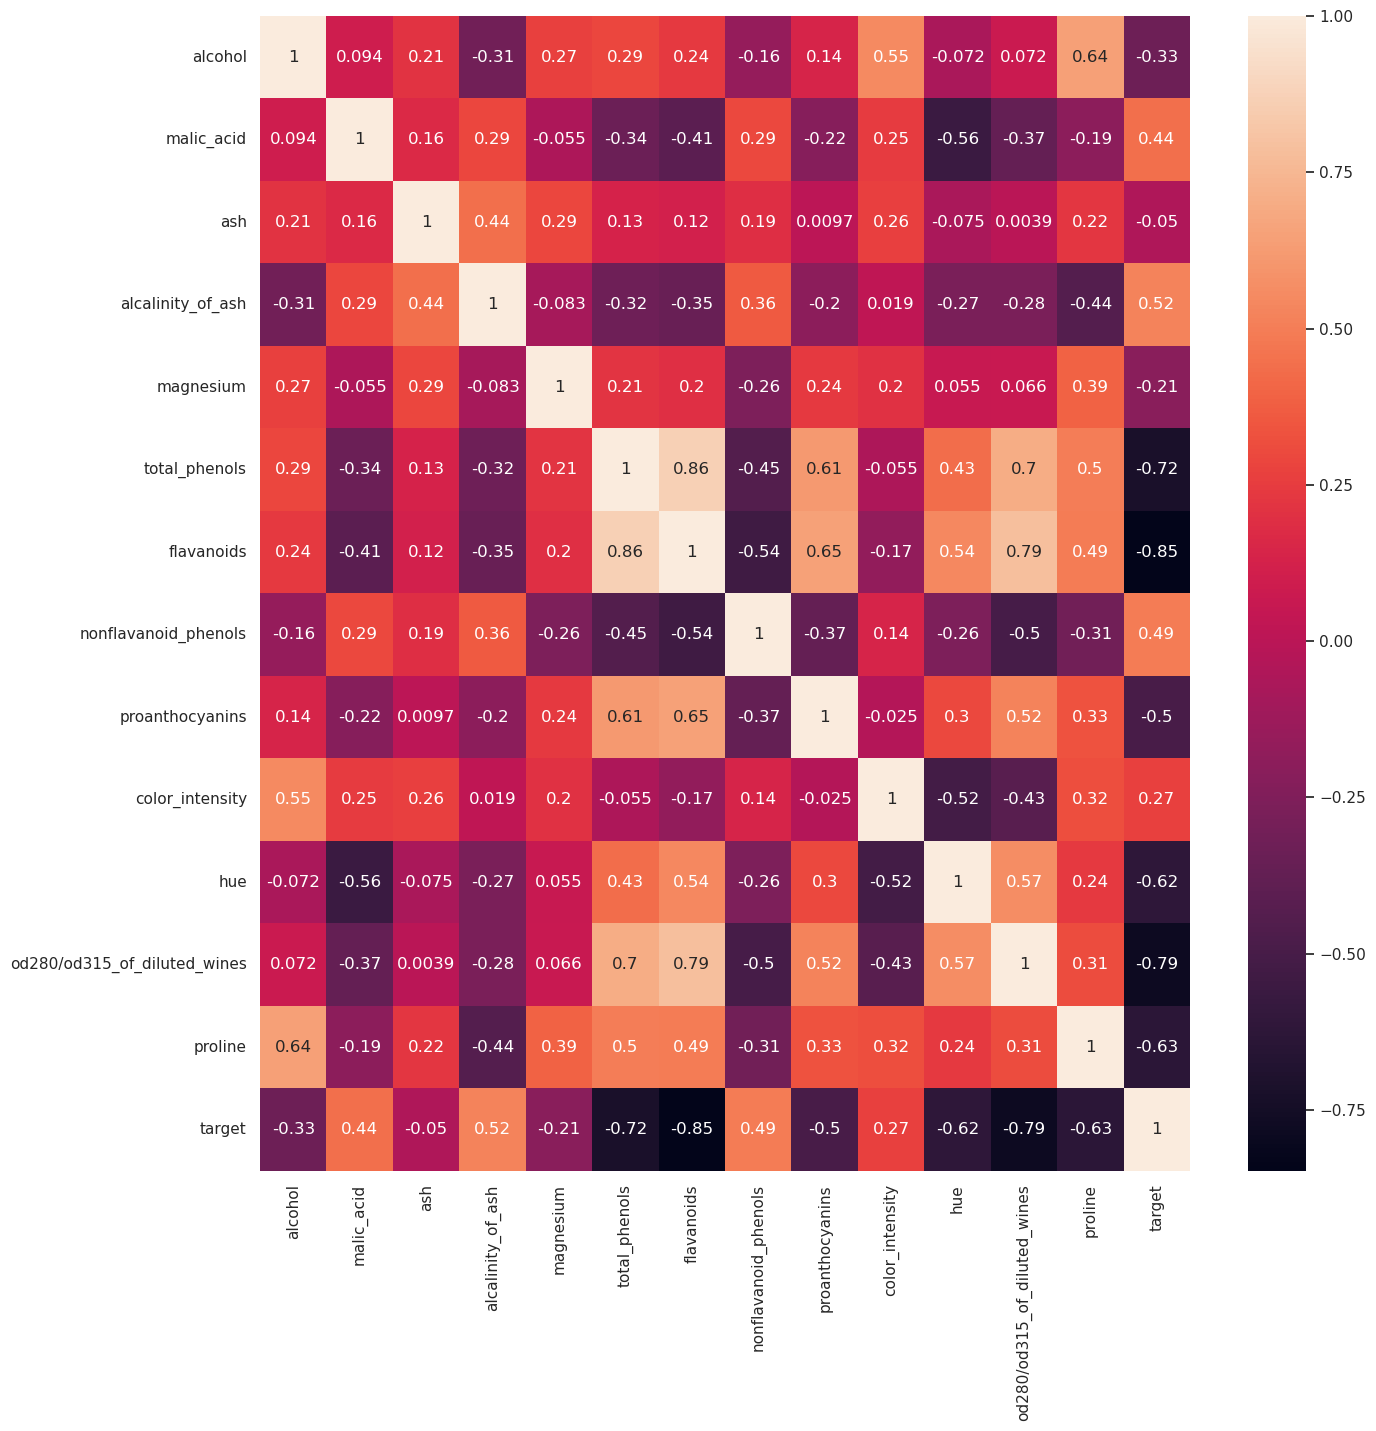

In [13]:
corr_matrix = df.corr()
plt.figure(figsize = (15,15))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### Wnioski 
* Zakresy wartości dla poszczególnych kategorii znajdują się na różnych skalach (od 0.01 do 100) - konieczne będzie skalowanie danych.
* Podstawowe statystyki różnicują się dla danych właściwości ze względu na klasę wina - w przypadku większości cech wartości są różne dla różnych klas.
* Rozkład danych dla większości cech jest równomierny (zbliżony do normalnego/lekko skośny), brak silnych wartości odbiegających. Skalowanie danych z wykorzystaniem MinMaxScaler() powinno zapewnić ich równomierny rozkład (metoda jest wrażliwa na oecność wartości odbiegających).
* Większość cech w dość silny sposób koreluje z 'targetem' - wpływają one w znacznym stopniu na jakość wina. Są również obecne silne korelacje pomiędzy zmiennymi (na etapie feature engineeringu usunięcie niektórych cech może poprawić jakość modelu)

# Przygotowanie danych do analizy

### Podział na zbiór treningowy i testowy

In [14]:
X = data.data.astype(np.float32)
y = data.target

In [15]:
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

Number of samples in the class:
Class 0: 41
Class 1: 50
Class 2: 33


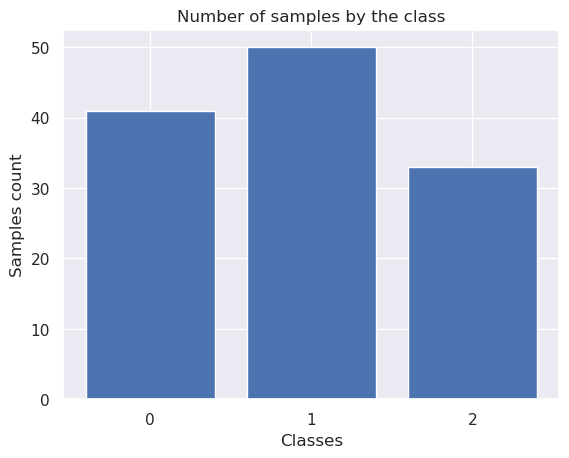

In [16]:
# Rozkład klas po podziale na zbiór treningowy i testowy
def class_distribution(dataset:np.array):
    count_samples =  np.unique(dataset,return_counts=True)
    print("Number of samples in the class:")
    for name, count in zip(count_samples[0], count_samples[1]):
        print(f"Class {name}: {count}")
    
    fig = plt.Figure(figsize=(15,15))
    plt.bar([str(x) for x in count_samples[0]],count_samples[1])
    plt.xlabel("Classes")
    plt.ylabel("Samples count")
    plt.title("Number of samples by the class")
    plt.show()


# Zbiór treningowy
class_distribution(y_train)

Number of samples in the class:
Class 0: 18
Class 1: 21
Class 2: 15


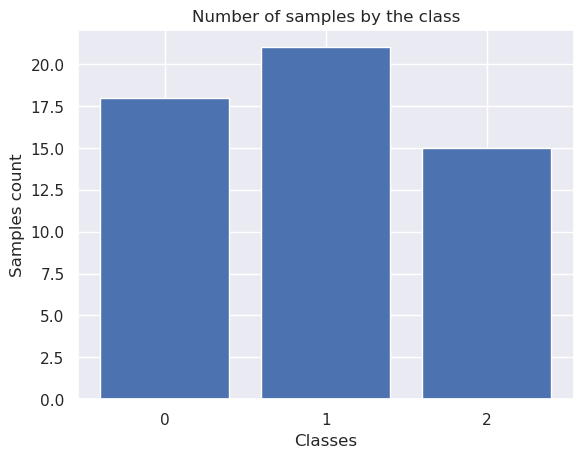

In [17]:
# Zbiór testowy
class_distribution(y_test)

In [18]:
# Wartości y przed treningiem należy poddać tranformacji 'one-hot-encode'
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Normalizacja danych

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

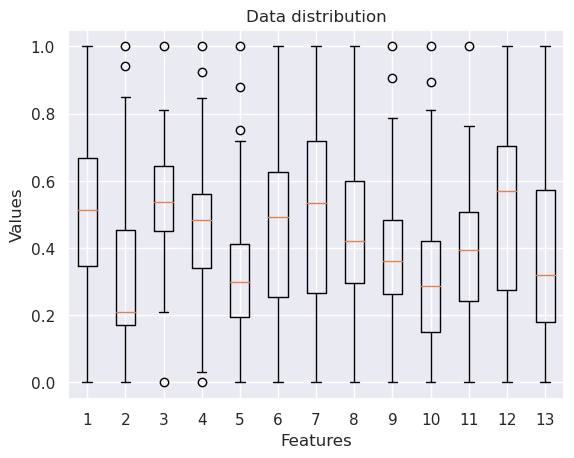

In [20]:
fig = plt.Figure(figsize=(15,15))
plt.boxplot(X_train)
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Data distribution")
plt.show()

### Wnioski
* Przy podziale zbioru na trening i test stosuje parametr stratify co zapewnia analogiczny rozkład próbek wszystkich klas w obu zbiorach jak wynika z wykresów.
* W przypadku klasyfikacji należy użyć metody 'one-hot-encoding' do transformacji etykiet klas z int (0,1,2) na wektory np. [1,0,0] = '0', [0,1,0]='1' itd.
* W wyniku sklaowania rozkład danych jest równomierny = wartości mediany dla większości zmiennych znajdują się w środku przedziału 0-1. Brak silnych wartości odbiegających.

# Budowa modelu

In [21]:
def create_model(neurons:list, optimizer:object, loss:str, dense_activ:str, drop_percent:float, out_activ:str, nclass:int):
    
    """
    Arguments:
        -neurons: list of neurons in each hidden layer, lenght of list is equal to number of hidden layers
        -optimizer: optimizer 
        -loss: loss function
        -dense_activ: dense layer activation funcion
        -drop_percent: percentage of dropped signals in the layer
        -out_activ: out layer activation funcion
        -nclass: number of target classes
    """
    # creates an empty model
    model = tf.keras.Sequential()
    # build model
    # input layer
    model.add(layers.InputLayer(input_shape=(X_train.shape[1])))

    # hidden layers
    for i,neuron_layer in enumerate(neurons):
        model.add(layers.Dense(units=neuron_layer, activation=dense_activ, use_bias=True, name=f"dense-layer-{i+1}"))
        model.add(layers.Dropout(drop_percent,name=f"dropout-layer-{i+1}"))

    # output layer
    model.add(layers.Dense(nclass, activation=out_activ, name="out"))
    
    # summary 
    print(model.summary())

    # compiles model
    model.compile(
        optimizer = optimizer,
        loss = loss,
        metrics=['accuracy']
    )
    
    return model

In [23]:
basic_model = create_model(
                neurons=[16,8], 
                optimizer=optimizers.Adam(learning_rate=0.001), # 0.001  = default learning rate
                loss='categorical_crossentropy', 
                dense_activ='relu', 
                drop_percent=0.3, 
                out_activ='softmax', 
                nclass=3
            )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense-layer-1 (Dense)       (None, 16)                224       
                                                                 
 dropout-layer-1 (Dropout)   (None, 16)                0         
                                                                 
 dense-layer-2 (Dense)       (None, 8)                 136       
                                                                 
 dropout-layer-2 (Dropout)   (None, 8)                 0         
                                                                 
 out (Dense)                 (None, 3)                 27        
                                                                 
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________
None


### Wnioski
* Przy multiklasyfikacji jako funkcję aktywacji dla warstwy wyjściowej należy zastosować 'softmax'. Zwraca ona wektor zawierający prawdopodobieństwa przynależności próbki do danej klasy.
* Liczba neuronów na wyjściu równa się liczbie klas (nclass).
* Jako fukcję kosztu należy zastosować 'categorical cross entropy' zamiast 'binary cross entropy' jak przypadku klasyfikacji binarnej.
* W zadaniu mamy do czynienia z multiklasyfikacją dla zbalansowanego zbioru danych (zbliżona liczba próbek danej klasy) - metryka 'accuracy' pozwoli dobrze ocenić jakość treningu/modelu. 

### Trening i walidacja modelu

In [24]:
results = basic_model.fit(
    x=X_train,
    y=y_train,
    batch_size=50,
    epochs=1000,
    verbose=0,
    validation_data=(X_test, y_test)
)

In [24]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

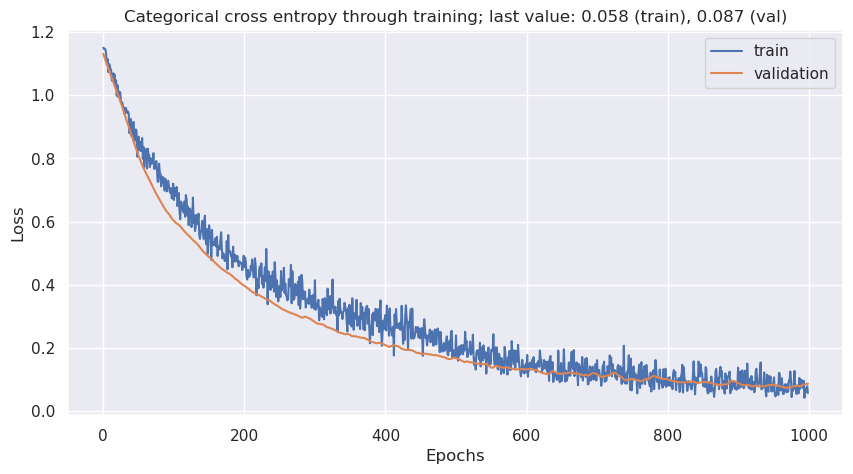

In [25]:
# Loss function - categorical cross entropy
fig = plt.figure(figsize=(10,5))
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Categorical cross entropy through training; last value: "+str(round(results.history["loss"][-1],3))+" (train), "+ str(round(results.history["val_loss"][-1],3))+ " (val)")
plt.legend(["train", "validation"])
plt.show()

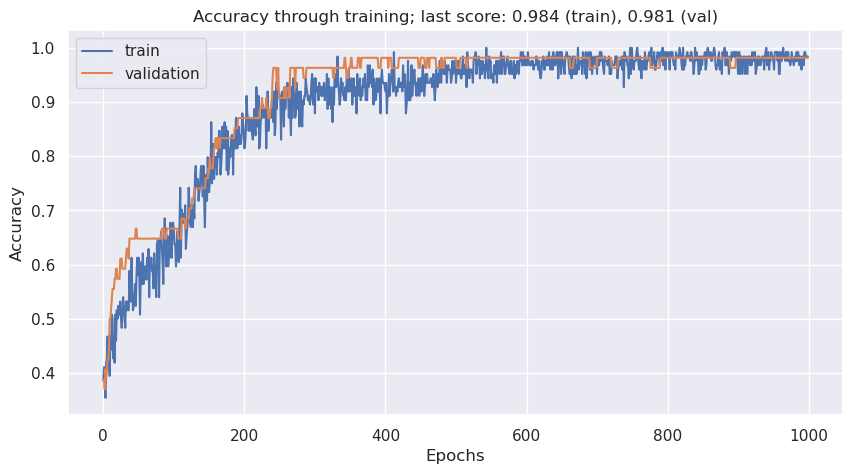

In [26]:
# Accuracy
fig = plt.figure(figsize=(10,5))
plt.plot(results.history["accuracy"])
plt.plot(results.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy through training; last score: "+str(round(results.history["accuracy"][-1],3))+" (train), "+ str(round(results.history["val_accuracy"][-1],3))+ " (val)")
plt.legend(["train", "validation"])
plt.show()

In [27]:
def evaluate_model(X,y,model):
        
    y_pred = model.predict(X,verbose=0)
    print(classification_report(y.argmax(axis=1), y_pred.argmax(axis=1)))   
    mat = confusion_matrix(y.argmax(axis=1), y_pred.argmax(axis=1))
 
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
 
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    pass

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



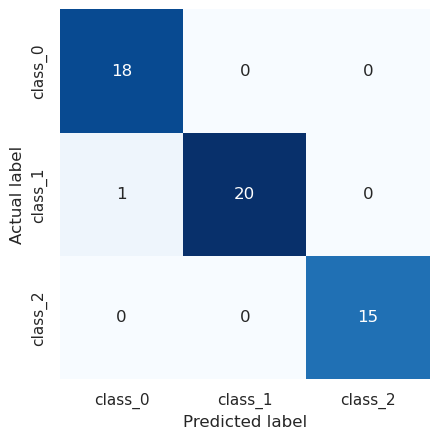

In [28]:
evaluate_model(X_test,y_test,basic_model)

### Wnioski
* Dla zadanych parametrów nie obserwujemy przeuczenia modelu - dokładność na zbiorze walidacyjnym jest większa niż na testowym.
* Obecny model już prezentuje bardzo wysoką dokładność (tylko jedna próbka została źle zaklasyfikowana). 
* Zmiana wartości leatning rate, liczby epok i innych może poprawić jakośc modelu. 

# Wpływ parametrów i architektury modelu na jakość modelu

### 1. Ilość warst głębokich (wielkość modelu)

In [29]:
size = {"small":[8],
        "medium":[16,8],
        "large":[64,32,16,8],
        }

results_size = []
models = {}
# create models
for key,value in size.items():
        models["model_"+key] = create_model(
                        neurons=value, 
                        optimizer=optimizers.Adam(learning_rate=0.001), # 0.001  = default learning rate
                        loss='categorical_crossentropy', 
                        dense_activ='relu', 
                        drop_percent=0.3, 
                        out_activ='softmax', 
                        nclass=3)
        
# fit models and save results
for model in models.keys():
        tmp_results =  models[model].fit(
                        x=X_train,
                        y=y_train,
                        batch_size=50,
                        epochs=1000,
                        verbose=0,
                        validation_data=(X_test, y_test))
        
        results_size.append(tmp_results)
    

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense-layer-1 (Dense)       (None, 8)                 112       
                                                                 
 dropout-layer-1 (Dropout)   (None, 8)                 0         
                                                                 
 out (Dense)                 (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense-layer-1 (Dense)       (None, 16)                224       
                                                                 
 dropout-layer-1 (Dropout)   

In [30]:
results_size[0].history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [46]:
def plot_metrics(title:str, parameters:dict, results:list):

    labels = list(parameters.keys())
    legend = [f"{labels[0]} (train)",f"{labels[0]} (val)", 
            f"{labels[1]} (train)",f"{labels[1]} (val)",
            f"{labels[2]} (train)",f"{labels[2]} (val)"]
    
    fig, ax = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(20,10))

    plt.suptitle(title)

    for i,c in zip(range(len(results)),['r','k','b']):
    
        ax[0].plot(results[i].history["loss"], color=c)
        ax[1].plot(results[i].history["accuracy"],color=c)
        ax[0].plot(results[i].history["val_loss"],linestyle='--',color=c)
        ax[1].plot(results[i].history["val_accuracy"],linestyle='--',color=c)
    
    ax[0].set_ylabel("Loss")
    ax[0].set_xlabel("Epochs")
    ax[0].legend(legend)
    ax[0].set_title("Loss function change during the training")

    ax[1].set_ylabel("Accuracy")
    ax[1].set_xlabel("Epochs")
    ax[0].legend(legend)
    ax[1].set_title("Accuracy change during the training")
    plt.tight_layout()
    plt.show()

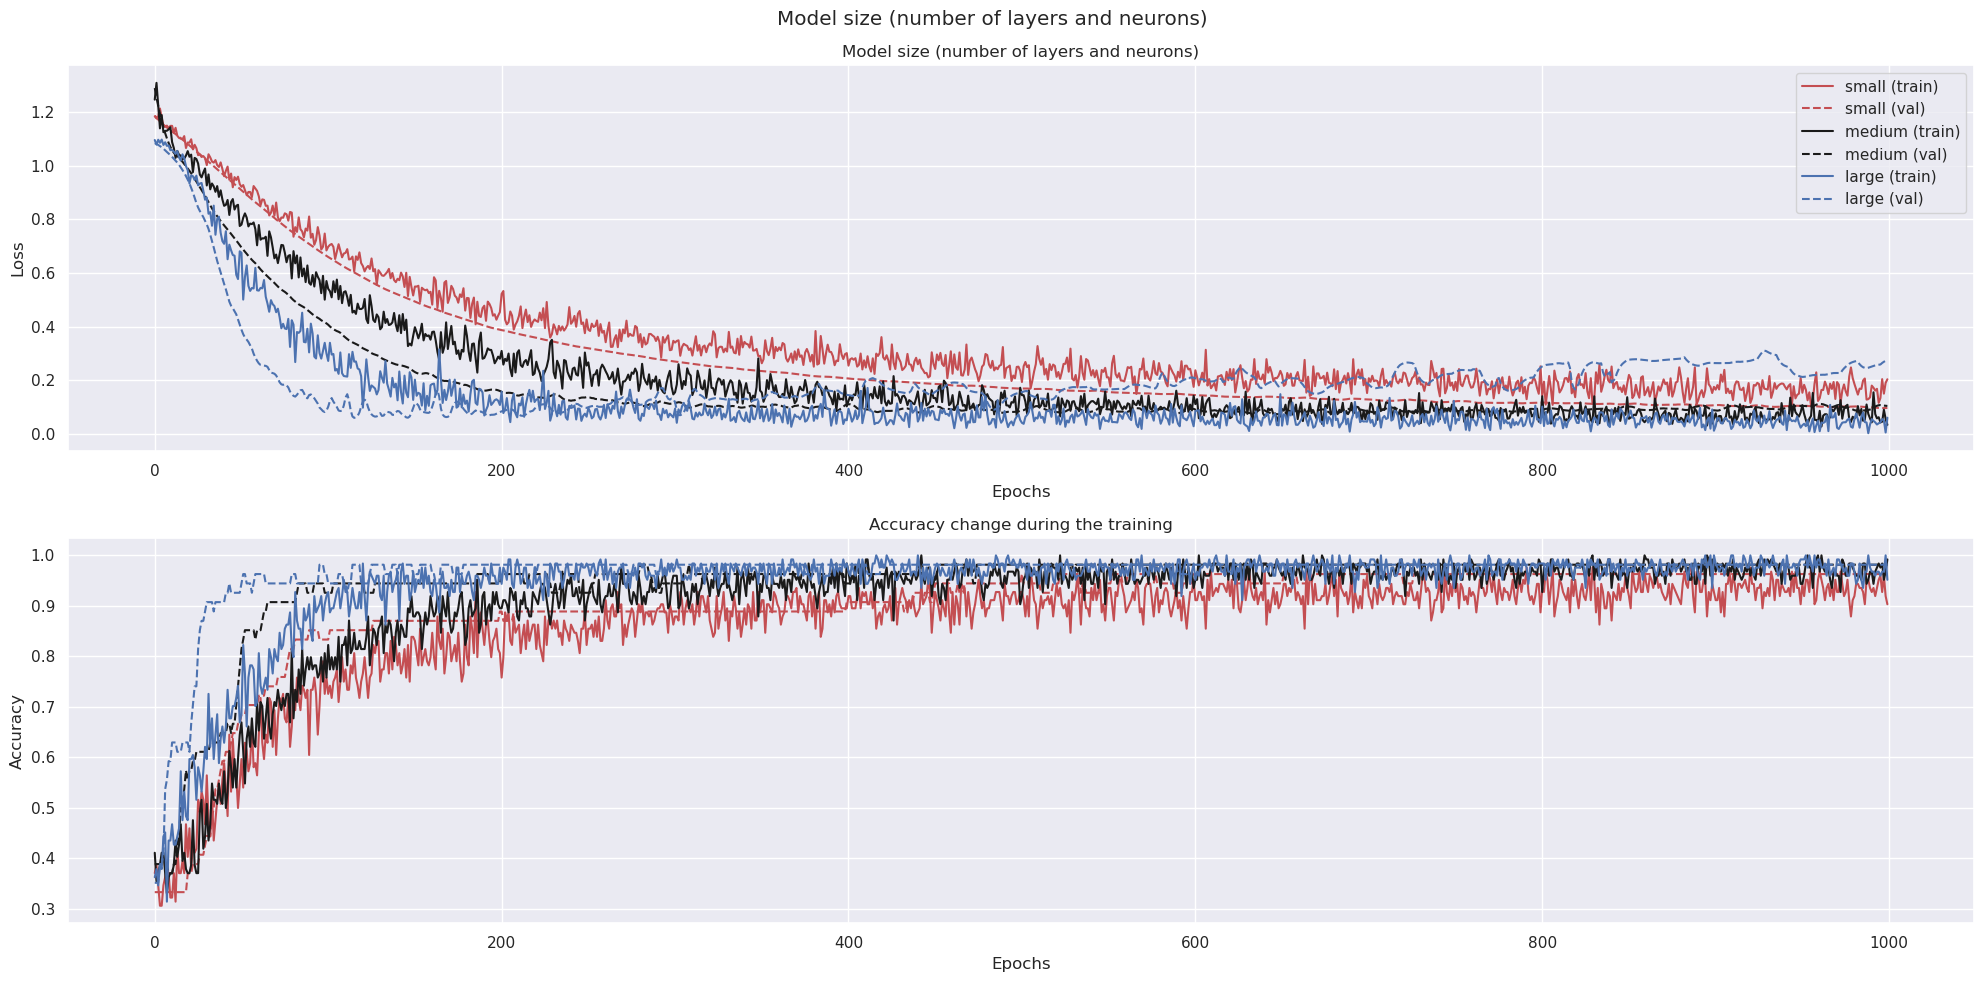

In [37]:
plot_metrics("Model size (number of layers and neurons)",size, results_size)

### Wnioski
* Dla najbardziej złożonego modelu dokładność bliska 100% zostaje osiągnięta już po około 200 iteracjach. Podobne wyniki dla zbioru walidacyjnego daje model o rozmiarze modelu bazowego.
* Dla żadnego z modli nie obserwujemy efektu przeuczenia.
* Wartość funkcji loss spada znacznie szybciej dla modelu 'large'.
* Optymalne jest pozostawienie ilości warst i neuronów na poziomie 'medium' (rozmiar modelu bazowego).

### 2. Wielkość parametru learning rate (szybkość uczenia się)

In [40]:
lrate = {"slow":0.00001,
        "moderate":0.001,
        "fast":1,
        }

results_lrate = []
models_lr = {}
# create models
for key,value in lrate.items():
        models_lr["model_"+key] = create_model(
                        neurons=[16,8], 
                        optimizer=optimizers.Adam(learning_rate=value), # 0.001  = default learning rate
                        loss='categorical_crossentropy', 
                        dense_activ='relu', 
                        drop_percent=0.3, 
                        out_activ='softmax', 
                        nclass=3)
        
# fit models and save results
for model in models_lr.keys():
        tmp_results =  models_lr[model].fit(
                        x=X_train,
                        y=y_train,
                        batch_size=50,
                        epochs=1000,
                        verbose=0,
                        validation_data=(X_test, y_test))
        
        results_lrate.append(tmp_results)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense-layer-1 (Dense)       (None, 16)                224       
                                                                 
 dropout-layer-1 (Dropout)   (None, 16)                0         
                                                                 
 dense-layer-2 (Dense)       (None, 8)                 136       
                                                                 
 dropout-layer-2 (Dropout)   (None, 8)                 0         
                                                                 
 out (Dense)                 (None, 3)                 27        
                                                                 
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_6"
_____________________________

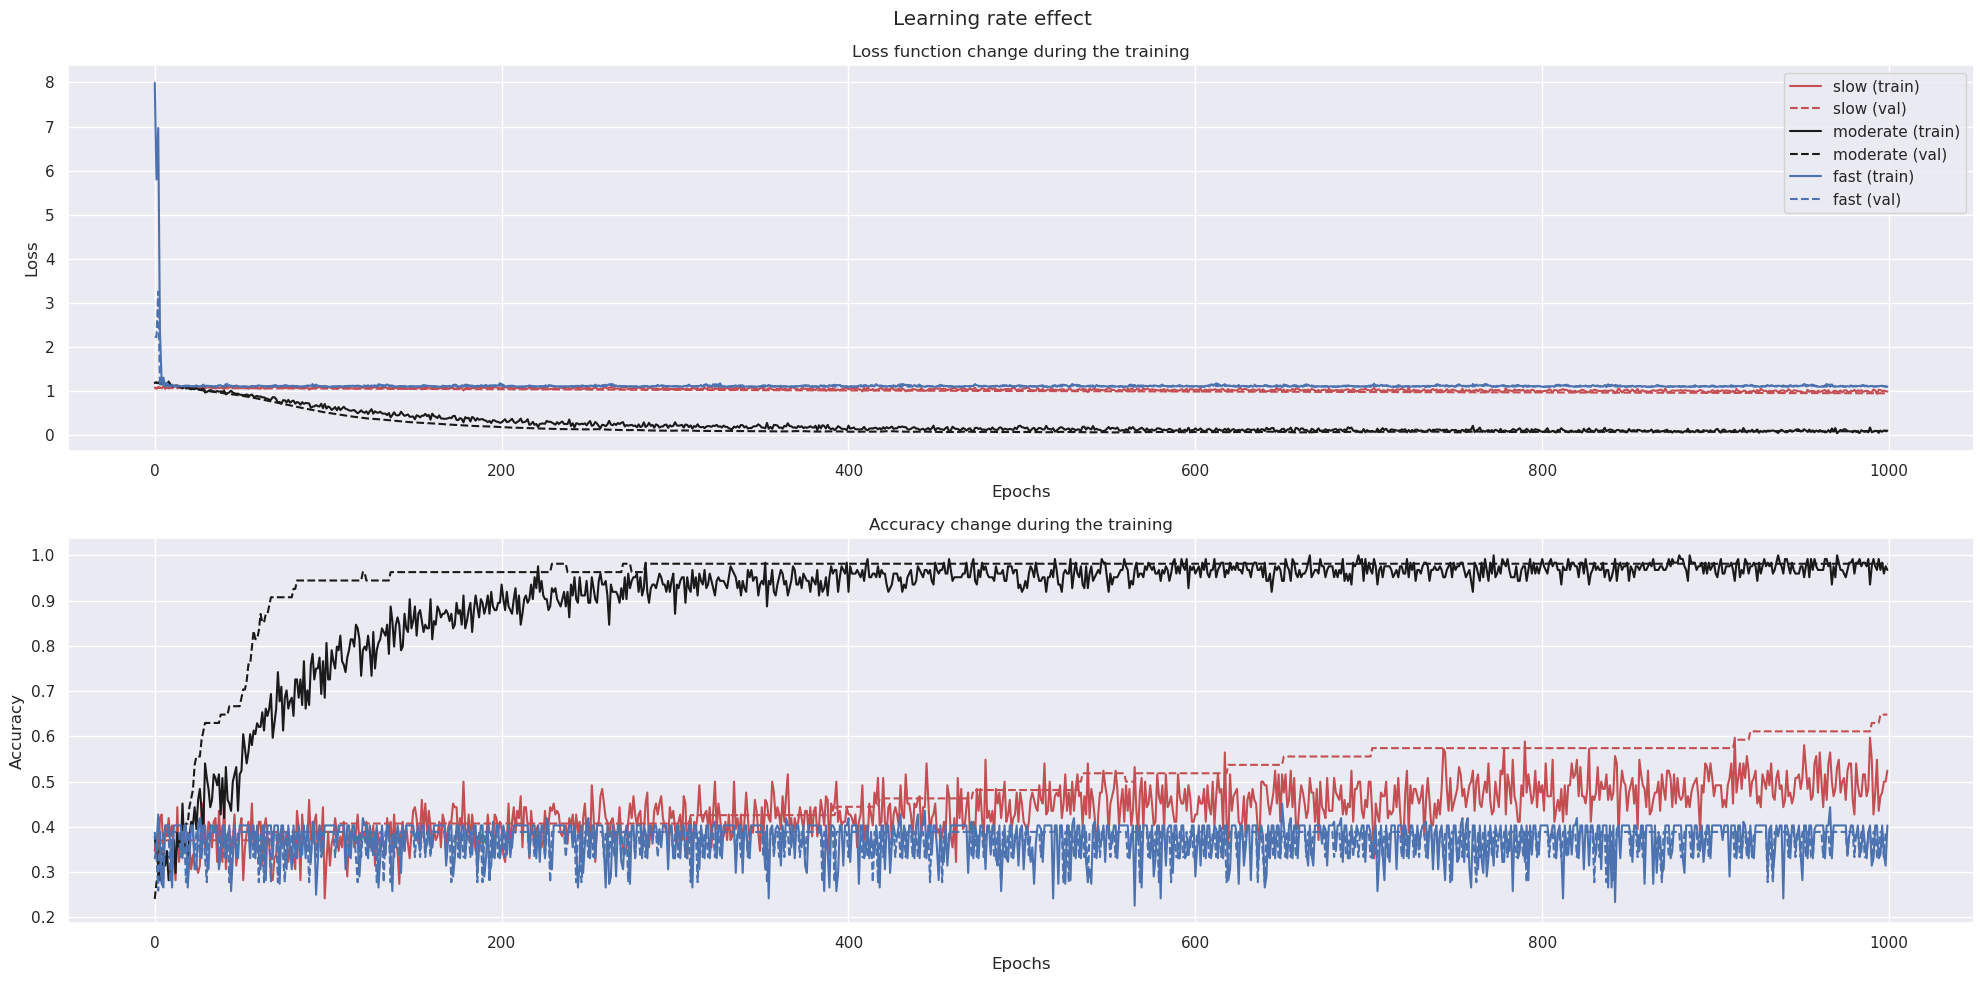

In [47]:
plot_metrics("Learning rate effect",lrate,results_lrate)

### Wnioski
* Zaówno zwiększenie jak i zmniejszenie szybkości uczenia znacząco pogarsza jakość modelu. Dla modelu 'fast' proces uczenia zatrzymuje się przy dokładności ok. 40%, dla modelu 'slow' po 1000 epokach dokładność modelu dopiero przekroczyła 50%.
* Optymalne jest pozostawienie parametru szybkości uczenia na poziomie 'moderate'.

### 3. Procent dezaktywowanych sygnałów w warstwie dropout

In [50]:
perctage_deact = {"low":0.1,
                "medium":0.3,
                "high":0.5,
        }

results_deact = []
models_deact = {}
# create models
for key,value in lrate.items():
        models_deact["model_"+key] = create_model(
                        neurons=[16,8], 
                        optimizer=optimizers.Adam(learning_rate=value), # 0.001  = default learning rate
                        loss='categorical_crossentropy', 
                        dense_activ='relu', 
                        drop_percent=0.3, 
                        out_activ='softmax', 
                        nclass=3)
        
# fit models and save results
for model in models_deact.keys():
        tmp_results =  models_deact[model].fit(
                        x=X_train,
                        y=y_train,
                        batch_size=50,
                        epochs=1000,
                        verbose=0,
                        validation_data=(X_test, y_test))
        
        results_deact.append(tmp_results)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense-layer-1 (Dense)       (None, 16)                224       
                                                                 
 dropout-layer-1 (Dropout)   (None, 16)                0         
                                                                 
 dense-layer-2 (Dense)       (None, 8)                 136       
                                                                 
 dropout-layer-2 (Dropout)   (None, 8)                 0         
                                                                 
 out (Dense)                 (None, 3)                 27        
                                                                 
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_12"
___________________________

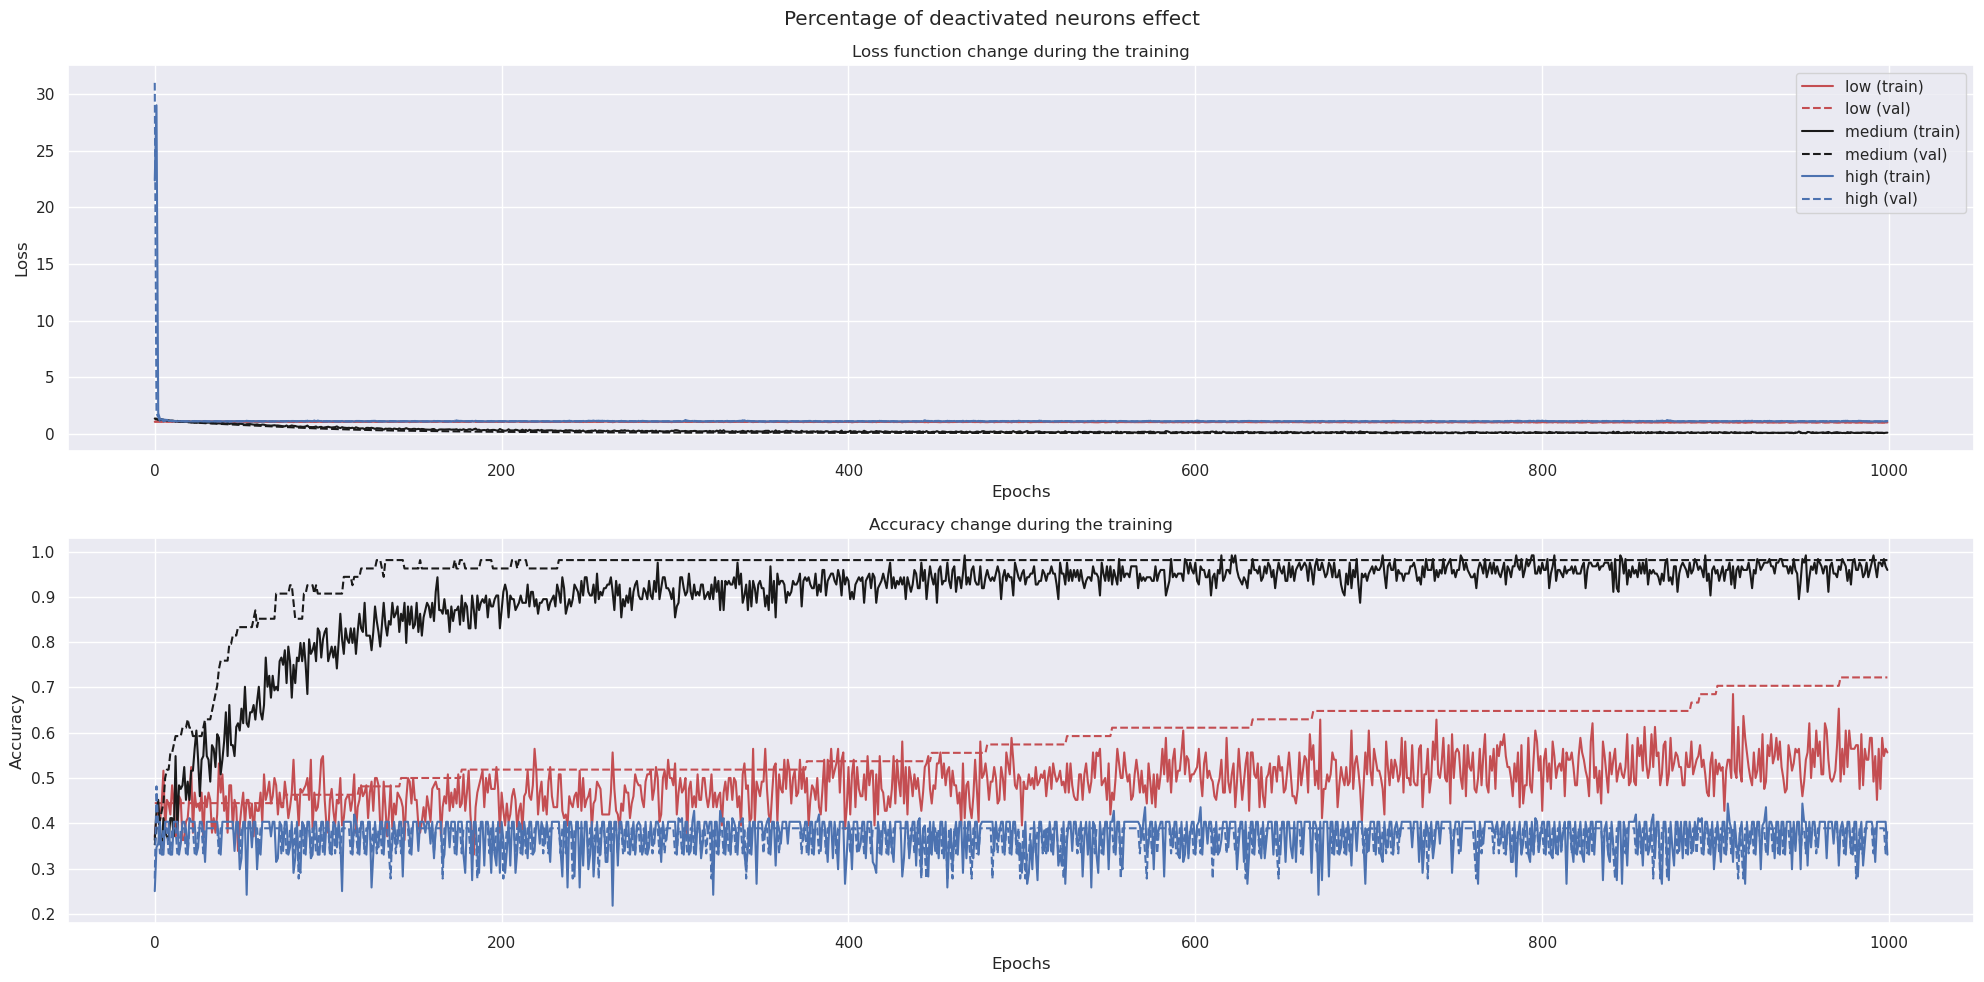

In [51]:
plot_metrics("Percentage of deactivated neurons effect", perctage_deact, results_deact)

### Wnioski
* Parametr zastosowany przy tworzeniu modelu bazowego ponownie okazał się optymalny - zarówno zwiększenie, jak i zmniejszenie procentowej ilości dezaktywowanych neuronów pogarsza jakość modelu.
* Przy małej ilości wygaszanych sygnałów proces uczenia znacznie zwalnia (widać jednocześnie, że parametry na zbiorze walidacyjnym są dużo lepsze niż na treningowych). Przy dużej ilości wygaszanych sygnałów proces uczenia zatrzymuje się. 